In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [2]:
#to visualize high dimensional data
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
x.shape

(150, 4)

In [6]:
pca = PCA(n_components=2)
x_pca=pca.fit_transform(x)
x_pca.shape

(150, 2)

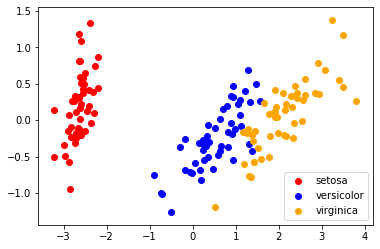

In [8]:
plt.figure()
plt.scatter(x_pca[y==0,0],x_pca[y==0,1],c='red',label=iris.target_names[0])
plt.scatter(x_pca[y==1,0],x_pca[y==1,1],c='blue',label=iris.target_names[1])
plt.scatter(x_pca[y==2,0],x_pca[y==2,1],c='orange',label=iris.target_names[2])
plt.legend()
plt.show()

In [9]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [10]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [11]:
pca.explained_variance_ratio_.sum()

0.977685206318795

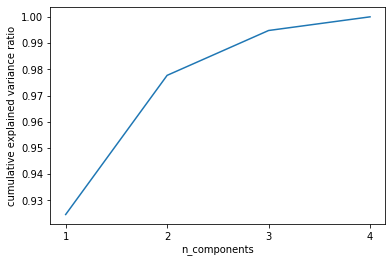

In [12]:
# to determine n_components - elbow point
pca_line = PCA().fit(x)
plt.plot(range(1,5),np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks(range(1,5))
plt.xlabel('n_components')
plt.ylabel('cumulative explained variance ratio')
plt.show()

In [14]:
# maximum likelihood estimation for n_components
# computationally expensive
pca_mle = PCA(n_components='mle')
pca_mle.fit(x)
pca_mle.explained_variance_ratio_.sum()

0.9947878161267247

In [15]:
pca_f = PCA(n_components=0.97,svd_solver='full')
pca_f.fit(x)
pca_f.explained_variance_ratio_.sum()

0.977685206318795

In [18]:
x_f = pca_f.transform(x)
x_f.shape

(150, 2)

In [ ]:
#parameter svd_solver
#'auto': 'full' + 'randomized'
#'full' 
#'randomized': randomly select components
#'arpack':randomly select components, for sparse feature matrices